<a href="https://colab.research.google.com/github/Catcereal/DeepLearning_Using_Python-Tensorflow-Keras-/blob/main/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
train_images = train_images.reshape((60000, 28 * 28)) #unsigned int 8byte -> 60000, 28, 28 인 배열로 저장
train_images = train_images.astype("float32") / 255   #-> float 32byte => 60000, 28, 28인 배영로 바꾼다.
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8747 - loss: 0.4375
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9643 - loss: 0.1192
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9775 - loss: 0.0728
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9847 - loss: 0.0513
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9890 - loss: 0.0366


In [ ]:
test_digits=test_images[0:10]
predictions=model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([2.0647104e-08, 3.2910179e-09, 6.7428373e-06, 4.7942889e-05,
       1.3041655e-11, 8.0162565e-08, 4.5792393e-12, 9.9994403e-01,
       3.2762469e-07, 6.9425914e-07], dtype=float32)

In [ ]:
test_labels[0]

np.uint8(7)

코드 2-7 새로운 데이터에서 모델 평가하기

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

NameError: name 'model' is not defined

2.2 신경망을 위한 데이터 표현

스칼라(랭크-0 텐서)

In [7]:
import numpy as np
x = np.array(12)
x

array(12)

In [8]:
x.ndim

0

벡터(랭크-1 텐서)

In [9]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [10]:
x.ndim

1

랭크-3 텐서와 더 높은 랭크의 텐서

In [23]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [14]:
train_images.ndim

3

In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
train_images.dtype

dtype('uint8')

8비트 정수형 랭크-3 텐서임을 알 수 있다.

28x28 크기의 정수 행렬 6만개가 있는 '배열'

행렬의 각 원소는 0~255 사이의 값을 가진다.

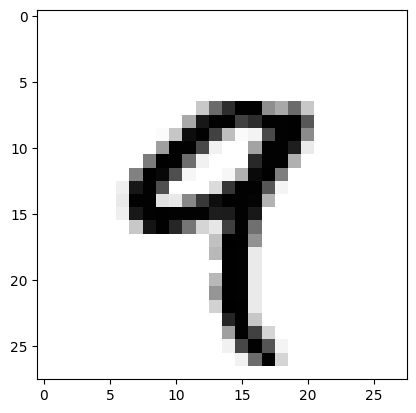

In [21]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [26]:
train_labels[4]

np.uint8(9)

넘파이로 텐서 조작하기

● 동일하지만 조금 더 자세한 표기법은 각 배열의 축을 따라 슬라이싱의 시작 인덱스와 마지막 인
덱스를 지정하는 것

● :(콜론)은 전체 인덱스를 선택

In [27]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [28]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [30]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

● 일반적으로 각 배열의 축을 따라 어떤 인덱스 사이도 선택할 수 있음

● 예를 들어 이미지의 오른쪽 아래 14×14 픽셀을 선택하려면 다음과 같이 함

In [31]:
my_slice = train_images[:, 14:, 14:]

In [32]:
my_slice = train_images[:, 7:-7, 7:-7]

배치 데이터

● 일반적으로 딥러닝에서 사용하는 모든 데이터 텐서의 첫 번째 축(인덱스가 0부터 시작하므로 0
번째 축)은 샘플 축(sample axis)(이따금 샘플 차원(sample dimension)이라고도 부름)

딥러닝 모델은 한 번에 전체 데이터셋을 처리하지 않는다. 그 대신 데이터를 작은 **배치(batch)**로 나눈다.

**MNIST** 숫자 데이터에서 크기가 128인 배치 하나는 다음과 같다.

In [33]:
batch = train_images[:128]

In [34]:
# 다음 배치
batch = train_images[128:256]

In [35]:
# n번째 배치
n = 3
batch = train_images[128 * n: 128 * (n+1)]

배치 데이터를 다룰 때 첫 번째 축(0번 축)을 배치 축(batch axis) 또는 배치 차원(batch
dimension)이라고 부름

### 텐서의 실제 사례

### 벡터 데이터

### 시계열 데이터 또는 시퀀스 데이터

### 이미지 데이터

### 비디오 데이터